## Tensorflow implementation of dataloaders for metaDengue


In [27]:
root = "./DATASET"
threshold = 3
batch_size = 4
image_size = (750, 750)

### Vanilla dataloder

In [28]:
import keras
import numpy as np
import json
from dataloaders.vanilla_dataloader import get_filepaths
from skimage import io
import math 
from skimage.transform import resize
import matplotlib.pyplot as plt
import pandas as pd

class vanilaTFDataloader(keras.utils.Sequence):
    """ 
    Tensorflow implementation of dataloader
    """
    def __init__(self, root, batch_size, image_size, transform = None):
        self.root = root
        self.batch_size = batch_size
        self.imgs = list(sorted(get_filepaths(root, ".tiff")))
        self.metadata = list(sorted(get_filepaths(root, ".json")))
        self.transform = transform
        self.image_size = image_size

    def __len__(self):
        return math.ceil(len(self.imgs) / self.batch_size)

    def __getitem__(self, ind):
        imgs_paths = self.imgs[ind * self.batch_size:(ind+1)*self.batch_size]
        metadata_paths = self.metadata[ind * self.batch_size:(ind+1)*self.batch_size]
        img_batch = []
        metadata_batch = []
        ## Read image and metadata over batch
        img_batch = [resize((np.array(io.imread(image_name))/255).astype("float32"), (image_size)) 
                    for image_name in imgs_paths]
        metadata_batch = [json.load(open(meta_name)) 
                         for meta_name in metadata_paths]

        return np.array(img_batch), metadata_batch

training_set = vanilaTFDataloader(root = root, batch_size=batch_size, image_size = image_size, transform = None)

Showing image with corresponding labels

(4, 750, 750, 12) float32 0.0 1.0


{'cases': 31, 'binary_classification': 1, 'incidence_rate': 0, 'multilabel': 0}

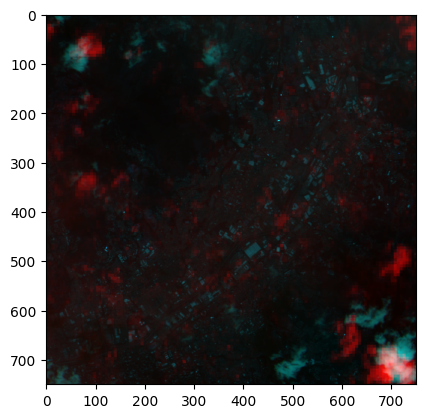

(4, 750, 750, 12) float32 0.0 1.0


{'cases': 63, 'binary_classification': 1, 'incidence_rate': 0, 'multilabel': 0}

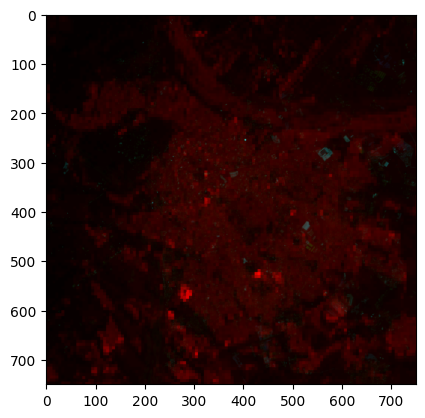

(4, 750, 750, 12) float32 0.0 1.0


{'cases': 27, 'binary_classification': 0, 'incidence_rate': 0, 'multilabel': 0}

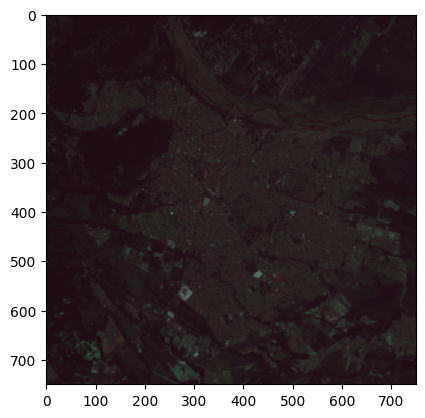

In [29]:
cont = 0
for x, y in training_set:
        print(x.shape, x.dtype, x.min(), x.max())
        
        display(y[0]["labels"])
        # Define your label here:
        #label = y["metadata"]["socioeconomic_data"]
        
        plt.imshow((x[cont,:,:,:])[:,:,:3])
        plt.show()
        
        cont+=1

        if cont==threshold:
                break


### Vanilla implementation using import - example

(4, 750, 750, 12) float32 0.0 1.0


{'cases': 31, 'binary_classification': 1, 'incidence_rate': 0, 'multilabel': 0}

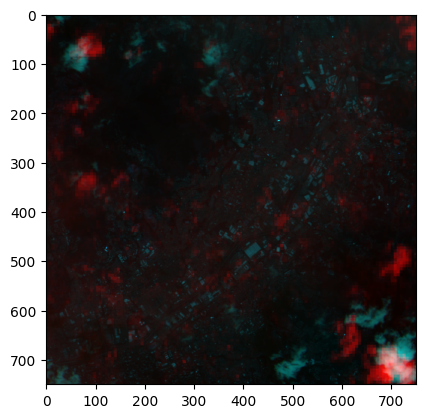

(4, 750, 750, 12) float32 0.0 1.0


{'cases': 63, 'binary_classification': 1, 'incidence_rate': 0, 'multilabel': 0}

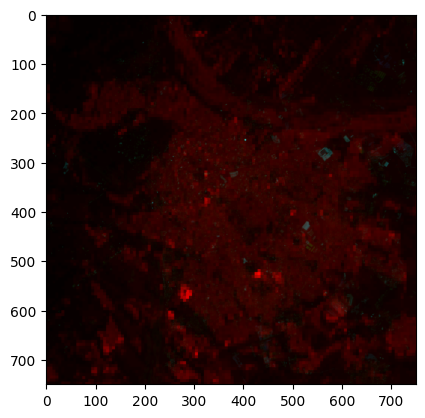

(4, 750, 750, 12) float32 0.0 1.0


{'cases': 27, 'binary_classification': 0, 'incidence_rate': 0, 'multilabel': 0}

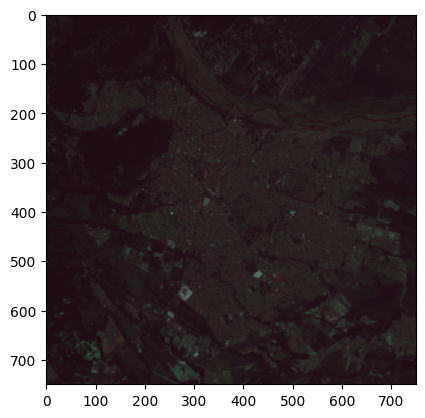

In [30]:
from dataloaders.tfvanilla_dataloader import get_filepaths, TFVanillaDataloader
import os 

training_set = TFVanillaDataloader(root = root, batch_size=batch_size, image_size = image_size, transform = None)
cont = 0
for x, y in training_set:
        print(x.shape, x.dtype, x.min(), x.max())
        
        display(y[0]["labels"])
        # Define your label here:
        #label = y["metadata"]["socioeconomic_data"]
        
        plt.imshow((x[cont,:,:,:])[:,:,:3])
        plt.show()
        
        cont+=1

        if cont==threshold:
                break


### Vanilla dataloader to filter municipalities - example

In [31]:
# Define the municipality codes that are to be used

municipality = [23001, 41001] 

In [32]:
from dataloaders.tffiltered_dataloader import get_filepaths, TFDataloader
import os 

training_set = TFDataloader(root = root, batch_size=batch_size, image_size = image_size, transform = None, municipality=municipality)


(4, 750, 750, 12) float32 0.0 1.0


{'cases': 31, 'binary_classification': 1, 'incidence_rate': 0, 'multilabel': 0}

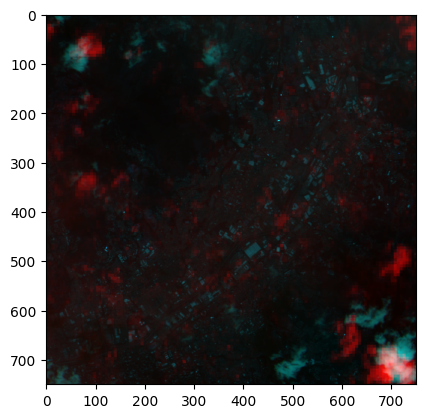

(4, 750, 750, 12) float32 0.0 1.0


{'cases': 63, 'binary_classification': 1, 'incidence_rate': 0, 'multilabel': 0}

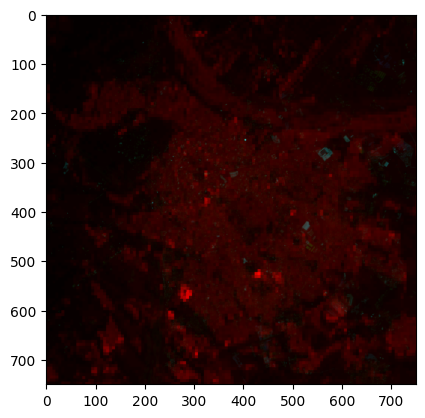

In [33]:
cont = 0
for x, y in training_set:
        print(x.shape, x.dtype, x.min(), x.max())
        
        display(y[0]["labels"])
        # Define your label here:
        #label = y["metadata"]["socioeconomic_data"]
        
        plt.imshow((x[cont,:,:,:])[:,:,:3])
        plt.show()
        
        cont+=1

        if cont==threshold:
                break

References
1. https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly
1. https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence